<a href="https://colab.research.google.com/github/adhadse/colab_repo/blob/master/homl/Ch%2018%20Reinforcement%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 18: Reinforcementt Learning
This work is partialy combined text and code from the book [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/) is only supposed to be used as reference and is recommended to follow along with a copy of the Book purchased.

In [14]:
"""
  From stackoverflow question
  https://stackoverflow.com/questions/53472940/nameerror-name-base-is-not-defined-openai-gym
"""
# install required system dependencies
!apt-get install -y xvfb x11-utils

# install required python dependencies (might need to install additional gym extras depending)
!pip install gym[CartPole-v1]==0.17.* pyvirtualdisplay==0.2.* PyOpenGL==3.1.* PyOpenGL-accelerate==3.1.*

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libxxf86dga1
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  libxxf86dga1 x11-utils xvfb
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 994 kB of archives.
After this operation, 2,981 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libxxf86dga1 amd64 2:1.1.4-1 [13.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 x11-utils amd64 7.7+3build1 [196 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.9 [784 kB]
Fetched 994 kB in 1s (1,542 kB/s)
Selecting previously unselected package libxxf86dga1:amd64.
(Reading database ... 160772 files and directories currently installed.)
Preparing to unpack .../libxxf86dga1_2%3a1.1.4-1_amd64.deb ...
Unpacking libxxf86dga1:amd64 (2:

In [15]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import gym
import seaborn as sns

sns.set_theme()


# To get smooth animations
%matplotlib inline
import matplotlib.animation as animation
mpl.rc('animation', html='jshtml')

# Learning to Optimize Rewards
In Reinforcement Learning, a software *agent* makes  *observations*  and takes *actions* within an *enivornment*, and in returns it recieves *rewards* or *punishment* depending on the objective.

The objective is to learn to act in a way that will maximise its expected rewards over time.

## Policy Search
<mark>The algorithm a software agent uses to determine its actions is called its *policy*.</mark>

# Introduction to OpenAI gym

In [ ]:
import gym

env = gym.make("CartPole-v1")
obs = env.reset() # After creating the environment; 
                  # intialize it -> returns the first observations
"""
[cart's horizontal position,
 velociy,
 the angle of the pole,
 angular velocity]
"""
obs

array([-0.0496869 ,  0.00416091, -0.00094953,  0.01021633])

In [ ]:
gym.envs.registry.all()

dict_values([EnvSpec(Copy-v0), EnvSpec(RepeatCopy-v0), EnvSpec(ReversedAddition-v0), EnvSpec(ReversedAddition3-v0), EnvSpec(DuplicatedInput-v0), EnvSpec(Reverse-v0), EnvSpec(CartPole-v0), EnvSpec(CartPole-v1), EnvSpec(MountainCar-v0), EnvSpec(MountainCarContinuous-v0), EnvSpec(Pendulum-v0), EnvSpec(Acrobot-v1), EnvSpec(LunarLander-v2), EnvSpec(LunarLanderContinuous-v2), EnvSpec(BipedalWalker-v3), EnvSpec(BipedalWalkerHardcore-v3), EnvSpec(CarRacing-v0), EnvSpec(Blackjack-v0), EnvSpec(KellyCoinflip-v0), EnvSpec(KellyCoinflipGeneralized-v0), EnvSpec(FrozenLake-v0), EnvSpec(FrozenLake8x8-v0), EnvSpec(CliffWalking-v0), EnvSpec(NChain-v0), EnvSpec(Roulette-v0), EnvSpec(Taxi-v3), EnvSpec(GuessingGame-v0), EnvSpec(HotterColder-v0), EnvSpec(Reacher-v2), EnvSpec(Pusher-v2), EnvSpec(Thrower-v2), EnvSpec(Striker-v2), EnvSpec(InvertedPendulum-v2), EnvSpec(InvertedDoublePendulum-v2), EnvSpec(HalfCheetah-v2), EnvSpec(HalfCheetah-v3), EnvSpec(Hopper-v2), EnvSpec(Hopper-v3), EnvSpec(Swimmer-v2), EnvSp

In [ ]:
"""
 Next 2 cells from 
 https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_12_01_ai_gym.ipynb
""" 
import gym
from gym.wrappers import Monitor
import glob
import io
import base64
from IPython.display import HTML
from pyvirtualdisplay import Display
from IPython import display as ipythondisplay

display = Display(visible=0, size=(1400, 900))
display.start()

"""
Utility functions to enable video recording of gym environment 
and displaying it.
To enable video, just do "env = wrap_env(env)""
"""

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 300px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

In [ ]:
env = wrap_env(gym.make("CartPole-v1"))

observation = env.reset()

while True:
    env.render()
    #your agent goes here
    action = env.action_space.sample() 
    observation, reward, done, info = env.step(action)    
    if done: 
      break;

show_video()

In [ ]:
env.render()

True

In [ ]:
obs

array([-0.0496869 ,  0.00416091, -0.00094953,  0.01021633])

Notice that the cart is now moving toward the right (`obs[1]` > 0). The pole is still tilted toward the left (`obs[2]` < 0), but its angular velocity is now positive (`obs[3]` > 0), so it will likely be tilted toward the right after the next steps as we accelerate it left.

In [ ]:
def plot_environment(env, figsize=(5,4)):
    plt.figure(figsize=figsize)
    img = env.render(mode="rgb_array")
    plt.imshow(img)
    plt.axis("off")
    plt.show()

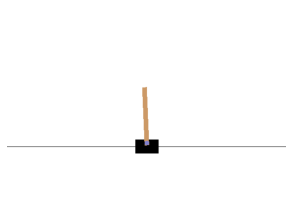

In [ ]:
plot_environment(env)

What actions are possible?

In [ ]:
env.action_space

Discrete(2)

Can do two actions; accelerate left(0) or right(1).

Let's accelerate the cart towards the left.

In [ ]:
obs

array([-0.0496869 ,  0.00416091, -0.00094953,  0.01021633])

In [ ]:
action = 0
obs, reward, done, info = env.step(action)

obs

array([ 0.02039252, -0.22988154,  0.00276078,  0.2784961 ])

In [ ]:
reward

1.0

In [ ]:
done

False

In [ ]:
info

{}

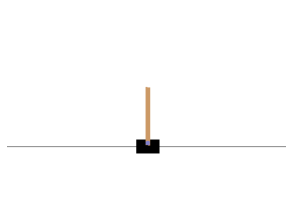

In [ ]:
plot_environment(env)

The `step()` method executed the given action and returned four value:

- `obs` 

  This is the new observation. The cart is moving towards the left (`obs[1] < 0`), and the angular velocity is positive i.e, in the clockwise direction (`obs[3]>0`) while being tilted towards right(`obs[2]>0`).

- `reward`

  In this environment, you get a reward of 1.0 at every step, no matter what.

- `done`

  This value becomes true when the episode is over.

- `info`

  Environment specific dictionary to provide some extra information.

  

Let's create a simple policy to accelerate left when the pole is leaning left and right otherwise.

In [ ]:
def basic_policy(obs):
  angle = obs[2]
  return 0 if angle < 0 else 1

totals = []
env = gym.make("CartPole-v1")
obs = env.reset()

In [ ]:
for episode in range(500):
  episode_rewards = 0
  obs = env.reset()
  for step in range(200):
    action = basic_policy(obs)
    obs, reward, done, info = env.step(action)
    episode_rewards += reward
    if done:
      break
  totals.append(episode_rewards)

In [ ]:
pd.Series({"Mean": np.mean(totals),
           "Std":  np.std(totals),
           "Min":  np.min(totals),
           "Max":  np.max(totals)})

Mean    41.768000
Std      8.866238
Min     24.000000
Max     68.000000
dtype: float64

Let's visualize one episode:

In [ ]:
# This cell don't show any video | try the next cell for animation
env = wrap_env(gym.make("CartPole-v1"))

observation = env.reset()

while True:
    env.render()
    env.reset()
    #your agent goes here
    for step in range(200):
      action = basic_policy(obs)
      observation, reward, done, info = env.step(action)
      if done:
        break;
    break;


show_video()
env.close()

In [ ]:
env = gym.make("CartPole-v1")

env.reset()
env.render()
env.seed(42)

frames = []

obs = env.reset()
for step in range(200):
    img = env.render(mode="rgb_array")
    frames.append(img)
    action = basic_policy(obs)

    obs, reward, done, info = env.step(action)
    if done:
        break

In [ ]:
def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames, repeat=False, interval=40):
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    anim = animation.FuncAnimation(
        fig, update_scene, fargs=(frames, patch),
        frames=len(frames), repeat=repeat, interval=interval)
    plt.close()
    return anim

In [ ]:
plot_animation(frames)

# Neural Network Policies
Now let's see how good a nerural network do good than a simple hard-coded policy.

For this we are going to create a Neural network that takes the observations as input, and outputs the action (in our case `0` or `1`) with some probability. We will then choose the action randomly with that probability.

This lets the agen i.e., the neural network find the right balance between *exploring*  new actions and *exploiting* the actions that are already well known to work well.


In [ ]:
keras.backend.clear_session()

n_inputs = 4 # = env.observation_space.shape[0]

model = keras.models.Sequential([
    keras.layers.Dense(5, activation="elu", input_shape=[n_inputs]),
    keras.layers.Dense(1, activation="sigmoid")
])

Let's write a small function that will run the model to play one episode, and return the frames so we can display an animation:

In [ ]:
def render_policy_net(model, n_max_steps=200,  seed=42):
  frames = []
  env = gym.make("CartPole-v1")
  env.seed(seed)
  np.random.seed(seed)
  obs = env.reset()
  for step in range(n_max_steps):
    frames.append(env.render(mode="rgb_array"))
    left_proba = model.predict(obs.reshape(1, -1))
    action = int(np.random.rand() > left_proba)
    obs, reward, done, info = env.step(action)
    if done:
      break;
  env.close()
  return frames

In [ ]:
obs.reshape(1,-1).shape

(1, 4)

Now let's look at how well this randomly initialized policy network performs:

In [ ]:
frames = render_policy_net(model)
plot_animation(frames)

Still pretty bad...

We can make the same net play in 50 different environments in parallel (this will give us a diverse training batch at each step), and train for 5000 iterations. We also reset environments when they are done. We train the model using a custom training loop so we can easily use the predictions at each training step to advance the environments.

In [ ]:
n_environments = 50
n_iterations = 5000

envs = [gym.make("CartPole-v1") for _ in range(n_environments)]
for index, env in enumerate(envs):
    env.seed(index)
np.random.seed(42)
observations = [env.reset() for env in envs]
optimizer = keras.optimizers.RMSprop()
loss_fn = keras.losses.binary_crossentropy

for iteration in range(n_iterations):
    # if angle < 0, we want proba(left) = 1., or else proba(left) = 0.
    target_probas = np.array([([1.] if obs[2] < 0 else [0.])
                              for obs in observations])
    with tf.GradientTape() as tape:
        left_probas = model(np.array(observations))
        loss = tf.reduce_mean(loss_fn(target_probas, left_probas))
    print("\rIteration: {}, Loss: {:.3f}".format(iteration, loss.numpy()), end="")
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    actions = (np.random.rand(n_environments, 1) > left_probas.numpy()).astype(np.int32)
    for env_index, env in enumerate(envs):
        obs, reward, done, info = env.step(actions[env_index][0])
        observations[env_index] = obs if not done else env.reset()

for env in envs:
    env.close()

Iteration: 4999, Loss: 0.096

In [ ]:
frames = render_policy_net(model)
plot_animation(frames)

So, atleast now the model seem to learned the basic policy. But what can be done to make it better.

# Evaluating Actions: The Credit Assignment Problem
The credit assignment problem occurs when the agent gets a reward, it is hard for it to know which actions should get credited (or blamed) for it.

To solve this a common strategy is to <mark>evaluate an action based on the sum of all the rewards that come after it, usually applying a *discout factor $\gamma$* at each step.</mark>

<mark>This sum of discounted rewards is called the action's ***return.***</mark>

***Action advantage*** is a term used when we want to estimate how much better or worse an action is, compared to the other possible actions, on average. <mark>To get action advantage calculated we must run many episodes and normalize all the action returns (by substracting the mean and dividing by the standard deviation).</mark>

# Policy Gradients
Let's go through a one popular class of PG algorithms, called ***REINFORCE*** algorithms's variant:
- To start off let the neural network policy play the game several time and at each time step compute the gradients but  don't apply them yet.
- Next, compute each *action's avantange*.
- If an action's advantage is:
  - Positve: action was good; apply the gradients making it even more likely in future.
  - Negative:  action was bad; apply the opposite gradients to make the action *less* likely in the future.
- At last compute the mean of all the resulting gradient vectors and perform a Gradient Descent step.


We are going to implement this in keras. 

First let's write a function to just Play one step.

In [ ]:
def play_one_step(env, obs, model, loss_fn):
  """
  returns observation, reward, done, gradients
  
  Take a next step by the environment depending on 
  the action taken by the agent (depending on probabilty calculated by model) 
  and compute gardients But don't apply it instead returns it.
  """
  with tf.GradientTape() as tape:
    left_proba = model(obs[np.newaxis])                         # reshape the obs to make a batch
    print("left_proba: ", left_proba)
    action = (tf.random.uniform([1, 1]) > left_proba)           # get the action depending on the left_proba
    y_target = tf.constant([[1.]]) - tf.cast(action, tf.float32)
    loss = tf.reduce_mean(loss_fn(y_target, left_proba))
  grads = tape.gradient(loss, model.trainable_variables)
  obs, reward, done, info = env.step(int(action[0, 0].numpy()))
  return obs, reward, done, grads

Then we write anther funtion that uses our previousky defined function `play_one_step()` to instead play multiple episodes.

In [ ]:
def play_multiple_episodes(env, n_episodes, n_max_steps, model, loss_fn):
  """
  returns all_rewards, all_grads for n_episodes each played n_max_steps times

  all_rewards: one reward list per episode, 
               containing one reward per step
  all_grads:   one gradient list per episode,
               each containing one tuple of gradients per step and 
               each tuple containing one gradient tensor per trainable variable
  """
  all_rewards = []
  all_grads = []
  for episode in range(n_episodes):
    current_rewards = []
    current_grads = []
    obs = env.reset()
    for step in range(n_max_steps):
      obs, reward, done, grads = play_one_step(env, obs, model, loss_fn)
      current_rewards.append(reward)
      current_grads.append(grads)
      if done:
        break;
    all_rewards.append(current_rewards)
    all_grads.append(current_grads)
  return all_rewards, all_grads

Now we'll have to look at these computed rewards, discount them, and normalize them.

In [ ]:
def discount_rewards(rewards, discount_factor):
  discounted = np.array(rewards)
  for step in range(len(rewards) - 2, -1, -1):
    discounted[step] += discounted[step + 1] * discount_factor
  return discounted

def discount_and_normalize_rewards(all_rewards, discount_factor):
  all_discounted_rewards = [discount_rewards(ep_rewards, discount_factor)
                          for ep_rewards in all_rewards]
  flat_rewards = np.concatenate(all_discounted_rewards)
  reward_mean = flat_rewards.mean()
  reward_std = flat_rewards.std()
  return [(discounted_rewards - reward_mean) / reward_std
          for discounted_rewards in all_discounted_rewards]

Let's check the two functions:

In [ ]:
discount_rewards([10, 0, -50], discount_factor=0.8)

array([-22, -40, -50])

In [ ]:
discount_and_normalize_rewards([[10, 0, -50], [10, 20]],
                               discount_factor=0.8)

[array([-0.28435071, -0.86597718, -1.18910299]),
 array([1.26665318, 1.0727777 ])]

Now, it's time to build our *REINFORCE* algorithm. before that we define the hyperameters.

In [ ]:
n_iterations = 150
n_episodes_per_update = 10
n_max_steps = 200
discount_factor = 0.95

and the optimizer and the loss function.

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.01)
loss_fn = keras.losses.binary_crossentropy

And at last our custom training loop.

In [ ]:
env = gym.make("CartPole-v1")
env.reset()

for iteration in range(n_iterations):
  all_rewards, all_grads = play_multiple_episodes(
      env, n_episodes_per_update, n_max_steps, model, loss_fn
  )
  all_final_rewards = discount_and_normalize_rewards(all_rewards, discount_factor=0.8)

  all_mean_grads = []
  for var_index in range(len(model.trainable_variables)):
    mean_grads = tf.reduce_mean(
        [final_reward * all_grads[episode_index][step][var_index]
         for episode_index, final_rewards in enumerate(all_final_rewards)
             for step, final_reward in enumerate(final_rewards)]
    , axis=0)
    all_mean_grads.append(mean_grads)
    optimizer.apply_gradients(zip(all_mean_grads, model.trainable_variables))

Streaming output truncated to the last 5000 lines.
left_proba:  tf.Tensor([[0.3266409]], shape=(1, 1), dtype=float32)
left_proba:  tf.Tensor([[0.11922526]], shape=(1, 1), dtype=float32)
left_proba:  tf.Tensor([[0.30892444]], shape=(1, 1), dtype=float32)
left_proba:  tf.Tensor([[0.1106354]], shape=(1, 1), dtype=float32)
left_proba:  tf.Tensor([[0.28675932]], shape=(1, 1), dtype=float32)
left_proba:  tf.Tensor([[0.59817255]], shape=(1, 1), dtype=float32)
left_proba:  tf.Tensor([[0.2851851]], shape=(1, 1), dtype=float32)
left_proba:  tf.Tensor([[0.59753776]], shape=(1, 1), dtype=float32)
left_proba:  tf.Tensor([[0.85605574]], shape=(1, 1), dtype=float32)
left_proba:  tf.Tensor([[0.63017887]], shape=(1, 1), dtype=float32)
left_proba:  tf.Tensor([[0.3196609]], shape=(1, 1), dtype=float32)
left_proba:  tf.Tensor([[0.6447044]], shape=(1, 1), dtype=float32)
left_proba:  tf.Tensor([[0.33507174]], shape=(1, 1), dtype=float32)
left_proba:  tf.Tensor([[0.6627704]], shape=(1, 1), dtype=float32)
lef

In [ ]:
try:
    import pyvirtualdisplay
    display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()
except ImportError:
    pass

In [ ]:
env = gym.make("CartPole-v1")

env.reset()
env.render()
env.seed(42)

In [ ]:
frames = render_policy_net(model)
plot_animation(frames)

There is another popular class of algorithms in which the agent learns to estimate the expected return for each action in each state, then using this knowledge to decide how to act instead of just  trying to optimize the policy incrementally in order to increase rewards. Introducing...

# Markov Decision Processes
<mark>Markov chains are those processes that has a fixed number of states and it can transition from one state to another at each  step. The probability for it to evolve from a state $s$ to $s'$  is fixed, and it depends only on the pair $(s, s')$ but not on past states.</mark>

*Markov decision processes* were discribed by Richard Bellman where <mark>at each step, an agent can choose one of several possible actions, and the transition probabilities depend on the chosen action.</mark>

<mark>**Optimal state value** $V^*(s)$ for any state $s$ is the sum of all discounted future rewards the agent can expect on average after it reaches a state $s$.</mark>

<mark>**Bellman Optimality Equation** states that if the agent acts optimally, then the optimal state value for the current state is equal to the reward it will get on average after taking one optimal action, plus the expected optimal value of all possible next states that this action can lead to.</mark>

*Equation 18-1 Bellman Optimality Equation*
$$V^*(s) = \max_a\sum_s T(s, a, s')[R(s, a, s') + \gamma.V^*(s')] \qquad \text{for all $s$}$$

In this equation:
- $T(s, a, s')$ is the transition probability from state $s$ to state $s'$, given that the agent choses the action $a$.
- $R(s, a, s')$ is the reward  that the agent gets when it goes  from state $s$ to $s'$, given that the agen chose action $a$.
- $\gamma$ is the discount factor.

We can then have a *Value iteration* algorithm that can estiimate the optimal state value for every possible state by first initailizing all the state value estimators to zero then iteratively update them using this *Value Iteration* algorithm.
*Equation 18-2. Value Iteration Algrithm*
$$V_{k+1}(s)\leftarrow \max_a\sum_{s'} T(s, a, s') [R(s, a, s') + \gamma.V_k(s')$$

In this equation, $V_k(s)$ is the estimated value.

But this doesn't really help is finding the optimal policy for the agent.

A similar action like the above one called *Q-value iteration* can be used to find the optimal *state-action values*  or *Q-Values*.

<mark>The optimal *Q-value* of the state-action pair $(s, a)$, noted $Q^*(s, a)$, is the sum of discounted  future rewards the agen can expect on average after it reaches state $s$ and chooses action $a$, but before it sees the outcome of this action, assuming it acts optimally after the action.</mark>

*Equation 18-3. Q-Value Iteration algorithm*
$$Q_{k+1}(s, a) \leftarrow \sum_{s'} T(s, a, s') \bigg[ R(s, a, s') + \gamma.\max_{a'} Q_k(s', a') \bigg]\qquad \text{for all $(s',a)$}$$

Now to get the optimal policy, $\pi^*(s)$ for the state $s$, the agent just need to choose the action with the highest Q-Value for that state.
$$\pi^*(s) = \text{argmax}_{\substack{a}} Q^*(s,a)$$

Let's define the MDP and apply the Q-Value iteration algorithm we just learned.

# Q-Value Iteration 

In [ ]:
transition_probabilities = [# shape=[s, a, s']
                            [[0.7, 0.3, 0.0], [1.0, 0.0, 0.0], [0.8, 0.2, 0.0]],
                            [[0.0, 1.0, 0.0], None, [0.0, 0.0, 1.0]],
                            [None, [0.8, 0.1, 0.1], None]]
rewards = [# shape = [s, a. s']
           [[+10, 0, 0], [0, 0, 0], [0, 0, 0]],
           [[0, 0, 0], [0, 0, 0], [0, 0, -50]],
           [[0, 0, 0], [+40, 0, 0], [0, 0, 0]]]
possible_actions = [[0, 1, 2], [0, 2], [1]] # possible actions at state s

Next intialize all the Q-values to 0.


In [ ]:
Q_values = np.full((3, 3), -np.inf) # -np.inf for impoassible actions
for state, actions in enumerate(possible_actions):
  Q_values[state, actions] = 0.0    # for all  possible actions

Then we can run the Q-Value iteration algorithm (by iteratively applying eq 18-3).

In [ ]:
gamma = 0.9 # the discount factor

history1 = []
for iteration in range(50):
  Q_prev = Q_values.copy()
  history1.append(Q_prev)
  for s in range(3):
    for a in possible_actions[s]:
      Q_values[s, a] = np.sum([
                               transition_probabilities[s][a][sp]
                               * (rewards[s][a][sp] + gamma * np.max(Q_prev[sp]))
                               for sp in range(3)
      ])

history1 = np.array(history1)
Q_values

array([[18.91891892, 17.02702702, 13.62162162],
       [ 0.        ,        -inf, -4.87971488],
       [       -inf, 50.13365013,        -inf]])

In [ ]:
np.argmax(Q_values, axis=1)   # optimal action for each state

array([0, 0, 1])

# Temporal Difference Learning
Teporal Difference Learning (TD learning) is very similar to Value iteration algorithm, but it taks into account the fact that the agent knows only the possible states and actions, and nothing more.

The algorithm uses *exploration policy* to explore the MDP and continues to update the estimates of the state value.

*Equation 18-4. TD learning algorithm*
$$V_{k+1}(s) \leftarrow (1-\alpha) V_k(s) +\alpha (r + \gamma.V_k(s'))$$
or equivalently,
$$V_{k+1}(s) \leftarrow V_k(s) + \alpha.\delta_k(s, r, s')$$
with $\delta_k(s, r, s') = r + \gamma.V_k(s') - V_k(s)$

In this equation:
- $\alpha$ is the learning rate
- $r + \gamma .V_k(s)$ is called the *TD target*
- $\delta_k(s, r, s')$ is called the *TD error*

We can rewrite the first equation in eq 18-4 with the notation $a\xleftarrow[\alpha]{}b$ which means $a_{k+1} =(1- \alpha). a_k + \alpha.b_k$, then:
> $$V(s) \xleftarrow[\alpha]{} r+ \gamma.V(s')$$



# Q-Learning
Q-Learning algorithm (an adaption of the Q-Value iteration algorithm) works by watching the agent play and then gardually improving its estimates of the Q-Values. Once it has accurate Q-Value estimates (or maybe even close enough), then the optimal policy becomes choosing the action that has the highest Q-value.

*Equation 18-5. Q-Learning algorithm*
$$Q\Big(s, a\Big) \xleftarrow[\alpha]{} r+ \gamma.\max_{a'} Q\Big(s', a'\Big)$$



To implement the Q-Learning algorithm, we first create a step function.

In [ ]:
def step(state, action):
  """
  Play the game one step given the current state and action
  Returns:
   - next_state
   - reward
  """
  probas = transition_probabilities[state][action]
  next_state = np.random.choice([0, 1, 2], p=probas)
  reward = rewards[state][action][next_state]
  return next_state, reward

In [ ]:
def exploration_policy(state):
  return np.random.choice(possible_actions[state])

Next we initialize the Q-values like earlier.

In [ ]:
Q_values = np.full((3, 3), -np.inf)

for state, actions in enumerate(possible_actions):
  Q_values[state, actions] = 0

Q_values

array([[  0.,   0.,   0.],
       [  0., -inf,   0.],
       [-inf,   0., -inf]])

Let's run the Q-Learning Algorithm.

In [ ]:
alpha0 = 0.05  # initial learning rate
decay = 0.005 # learning rate decay
gamma = 0.90  # discount factor
state = 0     # intial state 
history2 = []

for iteration in range(10_000):
  history2.append(Q_values.copy())
  action = exploration_policy(state)
  next_state, reward = step(state, action)
  next_value = np.max(Q_values[next_state])
  alpha = alpha0 / (1 + iteration * decay)
  Q_values[state, action] *= 1 - alpha
  Q_values[state, action] +=alpha * (reward + gamma * next_value)
  state = next_state


history2 = np.array(history2)

In [ ]:
Q_values

array([[18.55820079, 16.29928601, 13.06286665],
       [ 0.        ,        -inf, -8.54607516],
       [       -inf, 49.54998456,        -inf]])

In [ ]:
np.argmax(Q_values, axis=1) # optimal action for each state

array([0, 0, 1])

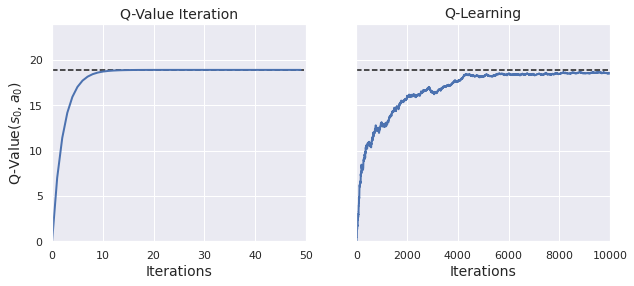

In [ ]:
true_Q_value = history1[-1, 0, 0]

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
axes[0].set_ylabel("Q-Value$(s_0, a_0)$", fontsize=14)
axes[0].set_title("Q-Value Iteration", fontsize=14)
axes[1].set_title("Q-Learning", fontsize=14)
for ax, width, history in zip(axes, (50, 10000), (history1, history2)):
    ax.plot([0, width], [true_Q_value, true_Q_value], "k--")
    ax.plot(np.arange(width), history[:, 0, 0], "b-", linewidth=2)
    ax.set_xlabel("Iterations", fontsize=14)
    ax.axis([0, width, 0, 24])

##Exploration Policies
Instead of using random exploration policy may take a very long time for the agent to experience every possible actions in the environment.

A better policy is to use <mark>*$\epsilon$-greedy policy* in which at each step it acts radomly with probability $\epsilon$, or greedily with probability $1-\epsilon$ (i.e., choosing the action with the highest Q-Value).

<mark>Another approach is to encourage the exploration policy to try actions that hasn't been tried much  before.

*Equation 18-6. Q-Learning using an exploration function*
$$Q\Big(s, a\Big) \xleftarrow[\alpha]{} r + \gamma . \max_{a'} f(Q(s', a'), N(s', a'))$$

In this eqution:
- $N(s', a')$ counts the number of times the action $a'$ was choosen in state $s'$.
- $f(Q, N)$ is an *exploration function*, such as $f(Q, N) = Q + \kappa/(1+N)$, where $\kappa$ is a curiosity hyperparmeter that measures how much the agent is attracted to the unknown.

## Approximate Q-Learning and Deep Q-Learning
The main problem with Q-Learning is that it only works with MDPs having minimal amount of states and actions, i.e., it doesn't scale.

<mark>The solution is to find a function $Q_\theta(s, a)$ that approximates the Q-Value of any state action pair $(s, a)$ using a manageble number of parameters (given by the hyperparameter vector $\theta$). This is called *Approximate Q-Learning*.</mark>

For that we use a DNN to estimate Q-Values called *Deep Q-Network* or (DQN), and using a DQN for Approximate Q-Learning is called *Deep Q-Learning*.

*Equation 18-7. Target Q-Value*
$$Q_\text{target}\Big(s, a\Big) = r + \gamma . \max_{a'}Q_\theta \Big(s', a'\Big)$$

# Deep Q-Network


In [ ]:
env = gym.make("CartPole-v1")
input_shape = [4] # == env.observation_space.shape | no of observation variables
n_outputs = 2     # == env.action_space.n

model = keras.models.Sequential([
    keras.layers.Dense(32, activation="elu", input_shape=input_shape),
    keras.layers.Dense(32, activation="elu"),
    keras.layers.Dense(n_outputs)
])

The $\epsilon$-greedy exploration policy.

In [ ]:
def epsilon_greedy_policy(state, epsilon=0):
  if np.random.rand() < epsilon:
    return np.random.randint(2)
  else:
    Q_values = model.predict(state[np.newaxis])
    return np.argmax(Q_values[0])

To reduce the correlations we will store all experiences in a *replay buffer* (or *replay memory*) and then sample a random training batch from it.

Each experience will be composed of five elements:

`[action_the agent_took,
  reward_gained,
  next_state_reached,
  boolean_done_if_episode_ended]`

In [ ]:
from collections import deque

replay_buffer = deque(maxlen=2000)

In [ ]:
def sample_experiences(batch_size):
  """
  Sample a random batch of experience from the replay buffer
 
  Returns: five NumPy arrays containing experience elements
  """
  indices = np.random.randint(len(replay_buffer), size=batch_size)
  batch = [replay_buffer[index] for index in indices]
  states, actions, rewards, next_state, dones = [
      np.array([experience[field_index] for experience in batch])
      for field_index in range(5)
  ]
  return states, actions, rewards, next_state, dones

In [ ]:
def play_one_step(env, state, epsilon):
  """
  Play the env one step using the Epsilon Greedy policy
  and append the experience to replay_buffer

  Returns: next_state, reward, done, info
  """
  action = epsilon_greedy_policy(state, epsilon)
  next_state, reward, done, info = env.step(action)
  replay_buffer.append((state, action, reward, next_state, done))
  return next_state, reward, done, info

In [ ]:
batch_size = 32
discount_factor = 0.95
optimizer = keras.optimizers.Adam(learning_rate=1e-3)
loss_fn = keras.losses.mean_squared_error

def training_step(batch_size):
  experiences = sample_experiences(batch_size)
  states, actions, rewards, next_states, dones = experiences
  next_Q_values = model.predict(next_states)
  max_next_Q_values = np.max(next_Q_values, axis=1)
  target_Q_values = (rewards + 
                     (1 - dones) * discount_factor * max_next_Q_values)
  mask = tf.one_hot(actions, n_outputs)
  with tf.GradientTape() as tape:
    all_Q_values = model(states)
    Q_values = tf.reduce_sum(all_Q_values * mask, axis=1, keepdims=True)
    loss = tf.reduce_mean(loss_fn(target_Q_values, Q_values))
  grads = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(grads, model.trainable_variables))

In [ ]:
rewards = [] 
best_score = 0

for episode in range(600):
  obs = env.reset()
  for step in range(200):
    epsilon = max(1 - episode / 500, 0.01)
    obs, reward, done, info = play_one_step(env, obs, epsilon)
    if done:
      break
  rewards.append(step) 
  if step >= best_score: 
      best_weights = model.get_weights() 
      best_score = step 
  if episode > 50:
    training_step(batch_size)
  
model.set_weights(best_weights)

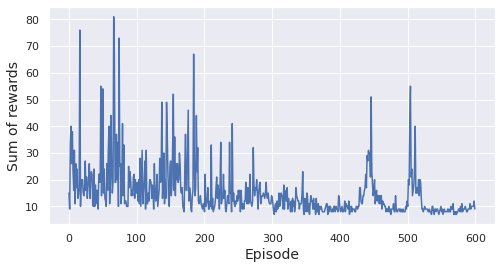

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(rewards)
plt.xlabel("Episode", fontsize=14)
plt.ylabel("Sum of rewards", fontsize=14)
plt.show()

In [ ]:
state = env.reset()

frames = []

for step in range(200):
    action = epsilon_greedy_policy(state)
    state, reward, done, info = env.step(action)
    if done:
        break
    img = env.render(mode="rgb_array")
    frames.append(img)
    
plot_animation(frames)

## Double DQN
In this variant we use  the online model instead of the target model when selecting the best actions for the next states, and using the tagret model only to estimate the Q-Values for these best actions.

In [ ]:
keras.backend.clear_session()

model = keras.models.Sequential([
    keras.layers.Dense(32, activation="elu", input_shape=[4]),
    keras.layers.Dense(32, activation="elu"),
    keras.layers.Dense(n_outputs)
])

target = keras.models.clone_model(model)
target.set_weights(model.get_weights())

In [ ]:
batch_size = 32
discount_rate = 0.95
optimizer = keras.optimizers.Adam(learning_rate=6e-3)
loss_fn = keras.losses.Huber()

def training_step(batch_size):
    experiences = sample_experiences(batch_size)
    states, actions, rewards, next_states, dones = experiences
    next_Q_values = model.predict(next_states)
    best_next_actions = np.argmax(next_Q_values, axis=1)
    next_mask = tf.one_hot(best_next_actions, n_outputs).numpy()
    next_best_Q_values = (target.predict(next_states) * next_mask).sum(axis=1)
    target_Q_values = (rewards + 
                       (1 - dones) * discount_rate * next_best_Q_values)
    target_Q_values = target_Q_values.reshape(-1, 1)
    mask = tf.one_hot(actions, n_outputs)
    with tf.GradientTape() as tape:
        all_Q_values = model(states)
        Q_values = tf.reduce_sum(all_Q_values * mask, axis=1, keepdims=True)
        loss = tf.reduce_mean(loss_fn(target_Q_values, Q_values))
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

In [ ]:
replay_memory = deque(maxlen=2000)

In [ ]:
env.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

rewards = []
best_score = 0

for episode in range(600):
    obs = env.reset()    
    for step in range(200):
        epsilon = max(1 - episode / 500, 0.01)
        obs, reward, done, info = play_one_step(env, obs, epsilon)
        if done:
            break
    rewards.append(step)
    if step >= best_score:
        best_weights = model.get_weights()
        best_score = step
    print("\rEpisode: {}, Steps: {}, eps: {:.3f}".format(episode, step + 1, epsilon), end="")
    if episode >= 50:
        training_step(batch_size)
        if episode % 50 == 0:
            target.set_weights(model.get_weights())
    # Alternatively, you can do soft updates at each step:
    #if episode >= 50:
        #target_weights = target.get_weights()
        #online_weights = model.get_weights()
        #for index in range(len(target_weights)):
        #    target_weights[index] = 0.99 * target_weights[index] + 0.01 * online_weights[index]
        #target.set_weights(target_weights)

model.set_weights(best_weights)

Episode: 599, Steps: 89, eps: 0.010

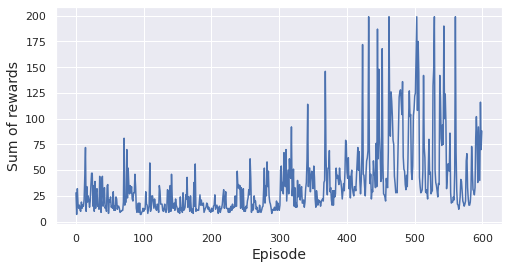

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(rewards)
plt.xlabel("Episode", fontsize=14)
plt.ylabel("Sum of rewards", fontsize=14)
plt.show()

## Prioritized Experience Replay
Sample important experiences (which are likely to lead to fast learning progress) more often. <mark>The reasonable approach is to measure the magnitude of the TD error $\delta = r + \gamma. V(s') - V(s)$. A large TD error indicates that the transition (s, r, s') is very suprising and thus probably worth learning from.</mark>

## Dueling Double DQN 


In [ ]:
keras.backend.clear_session()

K = keras.backend
input_states = keras.layers.Input(shape=[4])
hidden1 = keras.layers.Dense(32, activation="elu")(input_states)
hidden2 = keras.layers.Dense(32, activation="elu")(hidden1)
state_values = keras.layers.Dense(1)(hidden2)
raw_advantages = keras.layers.Dense(n_outputs)(hidden2)
advantages = raw_advantages - K.max(raw_advantages, axis=1, keepdims=True)
Q_values = state_values + advantages
model = keras.models.Model(inputs=[input_states], outputs=[Q_values])

target = keras.models.clone_model(model)
target.set_weights(model.get_weights())

In [ ]:
batch_size = 32
discount_rate = 0.95
optimizer = keras.optimizers.Adam(learning_rate=7.5e-3)
loss_fn = keras.losses.Huber()

def training_step(batch_size):
    experiences = sample_experiences(batch_size)
    states, actions, rewards, next_states, dones = experiences
    next_Q_values = model.predict(next_states)
    best_next_actions = np.argmax(next_Q_values, axis=1)
    next_mask = tf.one_hot(best_next_actions, n_outputs).numpy()
    next_best_Q_values = (target.predict(next_states) * next_mask).sum(axis=1)
    target_Q_values = (rewards + 
                       (1 - dones) * discount_rate * next_best_Q_values)
    target_Q_values = target_Q_values.reshape(-1, 1)
    mask = tf.one_hot(actions, n_outputs)
    with tf.GradientTape() as tape:
        all_Q_values = model(states)
        Q_values = tf.reduce_sum(all_Q_values * mask, axis=1, keepdims=True)
        loss = tf.reduce_mean(loss_fn(target_Q_values, Q_values))
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

In [ ]:
replay_memory = deque(maxlen=2000)

In [ ]:
env.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

rewards = []
best_score = 0

for episode in range(600):
    obs = env.reset()    
    for step in range(200):
        epsilon = max(1 - episode / 500, 0.01)
        obs, reward, done, info = play_one_step(env, obs, epsilon)
        if done:
            break
    rewards.append(step)
    if step >= best_score:
        best_weights = model.get_weights()
        best_score = step
    print("\rEpisode: {}, Steps: {}, eps: {:.3f}".format(episode, step + 1, epsilon), end="")
    if episode >= 50:
        training_step(batch_size)
        if episode % 50 == 0:
            target.set_weights(model.get_weights())

model.set_weights(best_weights)

Episode: 599, Steps: 28, eps: 0.010

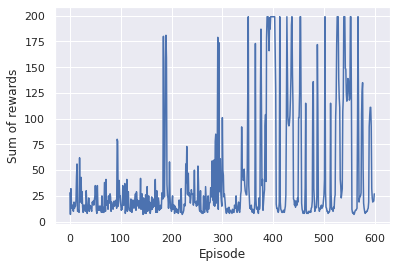

In [ ]:
plt.plot(rewards)
plt.xlabel("Episode")
plt.ylabel("Sum of rewards")
plt.show()

In [ ]:
env.seed(42)
state = env.reset()

frames = []

for step in range(200):
    action = epsilon_greedy_policy(state)
    state, reward, done, info = env.step(action)
    if done:
        break
    img = env.render(mode="rgb_array")
    frames.append(img)
    
plot_animation(frames)
env.close()

# The TF-Agents Library
## Installing TF-Agents

In [1]:
!pip install tf-agents

     |████████████████████████████████| 1.2MB 29.2MB/s 
     |████████████████████████████████| 4.8MB 39.4MB/s 
  Found existing installation: tensorflow-probability 0.12.1
    Uninstalling tensorflow-probability-0.12.1:
      Successfully uninstalled tensorflow-probability-0.12.1


Create TF-Agents environments that will wrap OenAI gym's Breakout environment.

In [2]:
!python3 -m pip install --upgrade 'gym[atari]'

     |████████████████████████████████| 1.6MB 24.1MB/s 
  Created wheel for gym: filename=gym-0.18.3-cp37-none-any.whl size=1657530 sha256=730e349c28ed533c53d778d3d04092d399ce8703a6cf64344ec3ad8cf4576d03
  Stored in directory: /root/.cache/pip/wheels/93/c2/4c/2b4c9b85119994837c08315c9415d71008325b7004d385b418
Successfully built gym
  Found existing installation: gym 0.17.3
    Uninstalling gym-0.17.3:
      Successfully uninstalled gym-0.17.3


In [3]:
!unrar x  /content/Roms.rar


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/Roms.rar

Extracting  HC ROMS.zip                                                   36%  OK 
Extracting  ROMS.zip                                                      74% 99%  OK 
All OK


In [4]:
!unzip /content/ROMS.zip

Archive:  /content/ROMS.zip
   creating: ROMS/
  inflating: ROMS/128 in 1 Game Select ROM (128 in 1) (Unknown) ~.bin  
  inflating: ROMS/2 Pak Special - Cavern Blaster, City War (1992) (HES) (773-867) (PAL).bin  
  inflating: ROMS/2 Pak Special - Challenge, Surfing (1990) (HES) (771-333) (PAL).bin  
  inflating: ROMS/2 Pak Special - Dolphin, Oink (1990) (HES) (771-341) (PAL).bin  
  inflating: ROMS/2 Pak Special - Dolphin, Pigs n' Wolf (1990) (HES) (771-341) (PAL).bin  
  inflating: ROMS/2 Pak Special - Dungeon Master, Creature Strike (1992) (HES) (773-891) (PAL).bin  
  inflating: ROMS/2 Pak Special - Hoppy, Alien Force (1992) (HES) (773-875) (PAL).bin  
  inflating: ROMS/2 Pak Special - Moto-Cross, Boom Bang (1990) (HES) (701-157) (PAL).bin  
  inflating: ROMS/2 Pak Special - Space Voyage, Fire Alert (1992) (HES) (773-883) (PAL).bin  
  inflating: ROMS/2 Pak Special - Star Warrior, Frogger (1990) (HES) (771-422) (PAL).bin  
  inflating: ROMS/2 Pak Special - Wall Defender, Planet Patr

In [5]:
!python3 -m atari_py.import_roms /content/ROMS

copying up_n_down.bin from /content/ROMS/Up 'n Down (1984) (SEGA - Beck-Tech, Steve Beck, Phat Ho) (009-01) ~.bin to /usr/local/lib/python3.7/dist-packages/atari_py/atari_roms/up_n_down.bin
copying surround.bin from /content/ROMS/Surround - Chase (Blockade) (1977) (Atari, Alan Miller - Sears) (CX2641 - 99807, 49-75105) ~.bin to /usr/local/lib/python3.7/dist-packages/atari_py/atari_roms/surround.bin
copying yars_revenge.bin from /content/ROMS/Yars' Revenge (Time Freeze) (1982) (Atari, Howard Scott Warshaw - Sears) (CX2655 - 49-75167) ~.bin to /usr/local/lib/python3.7/dist-packages/atari_py/atari_roms/yars_revenge.bin
copying gravitar.bin from /content/ROMS/Gravitar (1983) (Atari, Dan Hitchens, Mimi Nyden) (CX2685) ~.bin to /usr/local/lib/python3.7/dist-packages/atari_py/atari_roms/gravitar.bin
copying asteroids.bin from /content/ROMS/Asteroids (1981) (Atari, Brad Stewart - Sears) (CX2649 - 49-75163) [no copyright] ~.bin to /usr/local/lib/python3.7/dist-packages/atari_py/atari_roms/aster

## TF-Agents Environments


In [6]:
from tf_agents.environments import suite_gym

env = suite_gym.load("Breakout-v4")
env

In [7]:
env.gym

In [8]:
env.reset()

TimeStep(
{'discount': array(1., dtype=float32),
 'observation': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8),
 'reward': array(0., dtype=float32),
 'step_type': array(0, dtype=int32)})

In [9]:
env.step(1)  # Fire

TimeStep(
{'discount': array(1., dtype=float32),
 'observation': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8),
 'reward': array(0., dtype=float32),
 'step_type': array(1, dtype=int32)})

In [10]:
env.step(1).is_last()

False

In [11]:
# Here the discount is 1, 
# so there will be no discount 
env.step(1).discount

array(1., dtype=float32)

In [12]:
env.current_time_step()

TimeStep(
{'discount': array(1., dtype=float32),
 'observation': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8),
 'reward': array(0., dtype=float32),
 'step_type': array(1, dtype=int32)})

## Environment Specifications


In [13]:
env.observation_spec()

BoundedArraySpec(shape=(210, 160, 3), dtype=dtype('uint8'), name='observation', minimum=0, maximum=255)

In [ ]:
env.action_spec()

BoundedArraySpec(shape=(), dtype=dtype('int64'), name='action', minimum=0, maximum=3)

In [ ]:
env.time_step_spec()

TimeStep(
{'discount': BoundedArraySpec(shape=(), dtype=dtype('float32'), name='discount', minimum=0.0, maximum=1.0),
 'observation': BoundedArraySpec(shape=(210, 160, 3), dtype=dtype('uint8'), name='observation', minimum=0, maximum=255),
 'reward': ArraySpec(shape=(), dtype=dtype('float32'), name='reward'),
 'step_type': ArraySpec(shape=(), dtype=dtype('int32'), name='step_type')})

In [ ]:
env.render(mode="human")

True

In [ ]:
env.render(mode="rgb_array")

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [16]:
env.gym.get_action_meanings()

['NOOP', 'FIRE', 'RIGHT', 'LEFT']

## Environment Wrapppers snd Atari Preprocessing
TF-Agents provides several environment wrappers in the `tf_agents.environemnts.wrappers` package.

Let's try to wrap the TF-Agents environment in `ActionRepeat` wrapper which reapeats action over $n$ steps, accemulating rewards.

In [17]:
from tf_agents.environments.wrappers import ActionRepeat

repeating_env = ActionRepeat(env, times=4)

The `suite_gym.load()` function will both create the Gym environment and wrap it. Each wrapper will be created without any arguments, so if we want to set some arguments, we must pass a `lambda`.

In [18]:
from gym.wrappers import TimeLimit

limited_repeating_env = suite_gym.load(
    "Breakout-v4",
    gym_env_wrappers=[lambda env: TimeLimit(env, max_episode_steps=10_000)],
    env_wrappers=[lambda env: ActionRepeat(env, times=4)]
)

Since a single frame from the Breakout game is insuficient to tell the direction and speed of the ball to the agent (and to us also), we will use `FrameStack4` env wrapper which will output the observations composed of multiple frames stacked on top of each other along the channels dimension. 

In [19]:
from tf_agents.environments import suite_atari
from tf_agents.environments.atari_preprocessing import AtariPreprocessing
from tf_agents.environments.atari_wrappers import FrameStack4

max_episode_steps = 27_000 # ALE frames since 1 step = 4 frames
environment_name = "BreakoutNoFrameskip-v4"

env = suite_atari.load(
    environment_name,
    max_episode_steps=max_episode_steps,
    gym_env_wrappers=[AtariPreprocessing, FrameStack4]
)

At last wrap this in in `TFPyEnvironment` to make it usable from within a TensorFlow graph and making it support both pure Python environments and TensorFlow-based environments.


In [20]:
from tf_agents.environments.tf_py_environment import TFPyEnvironment

tf_env = TFPyEnvironment(env)

##Training Architecture
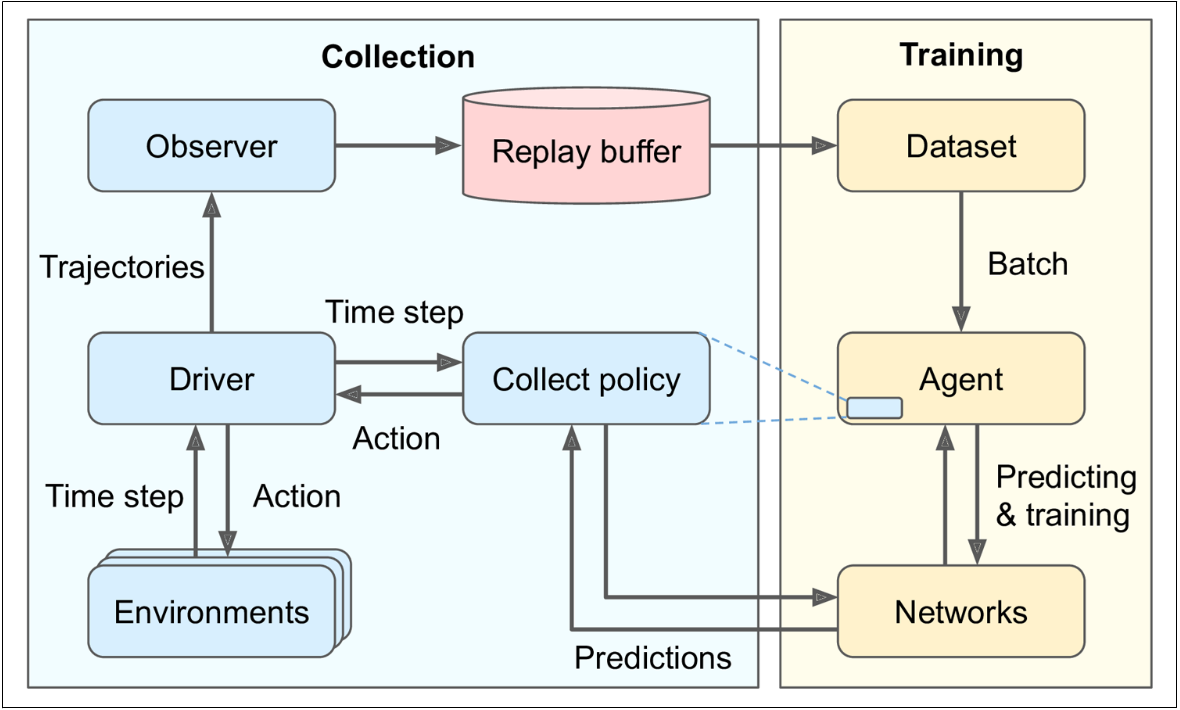

Source: Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition, Aurelien Geron



## Creating the Deep Q-Network
The TF-Agents library provides many networks in the `tf_agents.networks` package.

In [21]:
from tf_agents.networks.q_network import QNetwork

preprocessing_layer = keras.layers.Lambda(
    lambda obs: tf.cast(obs, np.float32) / 255.
)
conv_layer_params = [(32, (8, 8), 4),   # <=> 32, 8x8 filter with a stride of 4
                     (64, (4, 4), 2), 
                     (64, (3, 3), 1)]
fc_layer_params = [512]

q_net = QNetwork(
    tf_env.observation_spec(),
    tf_env.action_spec(),
    preprocessing_layers=preprocessing_layer,
    conv_layer_params=conv_layer_params,
    fc_layer_params=fc_layer_params
)

## Creating the DQN Agent
The TF-Agent library implements many types of agents in `tf_agents.agents` and it's subpackages.

In [22]:
from tf_agents.agents.dqn.dqn_agent import DqnAgent

train_step = tf.Variable(0)
update_period = 4 # train the model every 4 steps
optimizer = keras.optimizers.RMSprop(learning_rate=2.5e-4,
                                     rho=0.95,
                                     momentum=0.0,
                                     epsilon=0.00_001, 
                                     centered=True)
epsilon_fn = keras.optimizers.schedules.PolynomialDecay(
    initial_learning_rate=1.0,    # initial epsilon
    decay_steps=2_50_000 // update_period,     # <=> 10_00_000 ALE frames
    end_learning_rate=0.01        # final epsilon
)
agent = DqnAgent(tf_env.time_step_spec(),
                 tf_env.action_spec(),
                 q_network=q_net,
                 optimizer=optimizer,
                 target_update_period=2000, # 32_000 ALE frames
                 td_errors_loss_fn=keras.losses.Huber(reduction="none"),
                 gamma=0.99, # discount factor
                 train_step_counter=train_step,
                 epsilon_greedy=lambda: epsilon_fn(train_step)
)
agent.initialize()

## Creating the Replay Buffer and the Corresponding Observer
The TF-Agents provides various replay buffer implementations in the `tg_agents.replay_buffers` package. 

We are going to use `TFUniformReplayBuffer` which provides high performance implementation of a replay buffer with uniform sampling.

In [23]:
from tf_agents.replay_buffers.tf_uniform_replay_buffer import TFUniformReplayBuffer

replay_buffer = TFUniformReplayBuffer(
    data_spec=agent.collect_data_spec,
    batch_size=tf_env.batch_size,
    max_length=2_00_000
)

In [24]:
replay_buffer_observer = replay_buffer.add_batch

Create a simple custom observer that counts and displays the number of times it is called (except when it is passed a trajectory that represents the boundary between two episodes, as this does not count as a step):

In [25]:
class ShowProgress:
  def __init__(self, total):
    self.counter = 0
    self.total = total
  def __call__(self, trajectory):
    if not trajectory.is_boundary():
      self.counter += 1
    if self.counter % 100 == 0:
      print("\r{}/{}".format(self.counter, self.total), end="")

## Creating Training Metrics
TF-Agents implements several RL metrics in the `tf_agents.metrics` package.

In [26]:
from tf_agents.metrics import tf_metrics

train_metrics = [
    tf_metrics.NumberOfEpisodes(),
    tf_metrics.EnvironmentSteps(),
    tf_metrics.AverageReturnMetric(),
    tf_metrics.AverageEpisodeLengthMetric()
]

In [27]:
train_metrics[0].result()

<tf.Tensor: shape=(), dtype=int64, numpy=0>

In [28]:
from tf_agents.eval.metric_utils import log_metrics
import logging

logging.getLogger().setLevel(logging.INFO)
log_metrics(train_metrics)

INFO:absl: 
		 NumberOfEpisodes = 0
		 EnvironmentSteps = 0
		 AverageReturn = 0.0
		 AverageEpisodeLength = 0.0


## Creating the Collect Driver
<mark>A driver is an object that explores an environment using a given policy, collects experiences, and broadcast them to some observers.</mark>

At each time step, the following steps are cnducted:
- The driver passes the current time step to the collect policy, which uses this time step to choose an action and returns an *action step*  object containing the action.
- The driver then passes the action to the environment/environments, which returns the next time step.
- Finally, the driver creates a trajectory object to represent this transition and broadcast it to all the observers.




In [29]:
from tf_agents.drivers.dynamic_step_driver import DynamicStepDriver

collect_driver = DynamicStepDriver(
    tf_env, 
    agent.collect_policy,
    observers=[replay_buffer_observer] + train_metrics,
    num_steps=update_period      # collect 4 steps for each training iteration
)

In [30]:
from tf_agents.policies.random_tf_policy import RandomTFPolicy

initial_collect_policy = RandomTFPolicy(tf_env.time_step_spec(),
                                        tf_env.action_spec())

init_driver = DynamicStepDriver(
    tf_env,
    initial_collect_policy,
    observers=[replay_buffer.add_batch, ShowProgress(20_000)],
    num_steps=20_000    # <=> 80,000 ALE frames
)

final_time_step, final_policy_state = init_driver.run()

Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.while_loop(c, b, vars, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.while_loop(c, b, vars))


Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.while_loop(c, b, vars, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.while_loop(c, b, vars))


20000/20000

## Creating the Dataset



Let's sample 2 sub-episodes, with 3 time steps each and display them:

**Note**:
- `replay_buffer.get_next()` is deprecated. 
- We must use `replay_buffer.as_dataset(..., single_deterministic_pass=False)` instead.

In [31]:
trajectories, buffer_info = next(iter(replay_buffer.as_dataset(
    sample_batch_size=2,
    num_steps=3,
    single_deterministic_pass=False
)))

Instructions for updating:
Use `as_dataset(..., single_deterministic_pass=False) instead.


Instructions for updating:
Use `as_dataset(..., single_deterministic_pass=False) instead.


In [32]:
trajectories._fields

('step_type',
 'observation',
 'action',
 'policy_info',
 'next_step_type',
 'reward',
 'discount')

In [33]:
# There is two trajectories, each with three steps
# and each observation is of 84x84x3 dimension
trajectories.observation.shape

TensorShape([2, 3, 84, 84, 4])

In [34]:
trajectories.step_type.numpy()

array([[1, 1, 1],
       [1, 1, 1]], dtype=int32)

In [40]:
from tf_agents.trajectories.trajectory import to_transition

time_steps, action_steps, net_time_steps = to_transition(trajectories)
time_steps.observation.shape

TensorShape([2, 2, 84, 84, 4])

In [36]:
def plot_observation(obs):
    # Since there are only 3 color channels, you cannot display 4 frames
    # with one primary color per frame. So this code computes the delta between
    # the current frame and the mean of the other frames, and it adds this delta
    # to the red and blue channels to get a pink color for the current frame.
    obs = obs.astype(np.float32)
    img = obs[..., :3]
    current_frame_delta = np.maximum(obs[..., 3] - obs[..., :3].mean(axis=-1), 0.)
    img[..., 0] += current_frame_delta
    img[..., 2] += current_frame_delta
    img = np.clip(img / 150, 0, 1)
    plt.imshow(img)
    plt.axis("off")

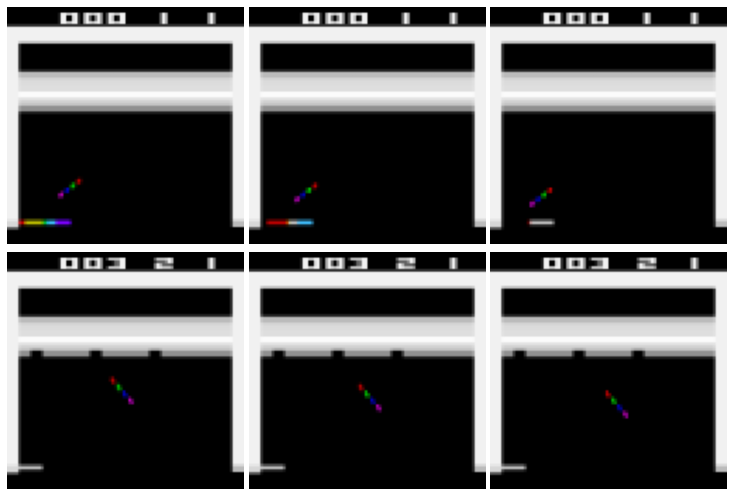

In [39]:
plt.figure(figsize=(10, 6.8))
for row in range(2):
    for col in range(3):
        plt.subplot(2, 3, row * 3 + col + 1)
        plot_observation(trajectories.observation[row, col].numpy())
plt.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0, wspace=0.02)
plt.show()

In [41]:
dataset = replay_buffer.as_dataset(
    sample_batch_size=64,
    num_steps=2,
    num_parallel_calls=3
).prefetch(2)

## Creating the Training Loop


In [43]:
from tf_agents.utils.common import function

collect_driver.run = function(collect_driver.run)
agent.train = function(agent.train)

In [46]:
def train_agent(n_iterations):
  time_step = None
  policy_state = agent.collect_policy.get_initial_state(tf_env.batch_size)
  iterator = iter(dataset)
  for iteration in range(n_iterations):
    time_step, policy_state = collect_driver.run(time_step, policy_state)
    trajectories, buffer_info = next(iterator)
    train_loss = agent.train(trajectories)
    print("\r{} loss:{:.5f}".format(
        iteration, train_loss.loss.numpy()
    ), end="")
    if iteration % 100 == 0:
      log_metrics(train_metrics)

In [48]:
train_agent(5_000)

INFO:absl: 
		 NumberOfEpisodes = 16
		 EnvironmentSteps = 2748
		 AverageReturn = 0.6000000238418579
		 AverageEpisodeLength = 165.1999969482422


99 loss:0.00004

INFO:absl: 
		 NumberOfEpisodes = 18
		 EnvironmentSteps = 3148
		 AverageReturn = 0.800000011920929
		 AverageEpisodeLength = 168.6999969482422


198 loss:0.00005

INFO:absl: 
		 NumberOfEpisodes = 20
		 EnvironmentSteps = 3548
		 AverageReturn = 1.2999999523162842
		 AverageEpisodeLength = 187.39999389648438


298 loss:0.00006

INFO:absl: 
		 NumberOfEpisodes = 22
		 EnvironmentSteps = 3948
		 AverageReturn = 1.2999999523162842
		 AverageEpisodeLength = 188.1999969482422


398 loss:0.00021

INFO:absl: 
		 NumberOfEpisodes = 24
		 EnvironmentSteps = 4348
		 AverageReturn = 1.5
		 AverageEpisodeLength = 198.60000610351562


498 loss:0.00030

INFO:absl: 
		 NumberOfEpisodes = 26
		 EnvironmentSteps = 4748
		 AverageReturn = 1.899999976158142
		 AverageEpisodeLength = 209.0


598 loss:0.00009

INFO:absl: 
		 NumberOfEpisodes = 28
		 EnvironmentSteps = 5148
		 AverageReturn = 1.600000023841858
		 AverageEpisodeLength = 199.5


699 loss:0.00010

INFO:absl: 
		 NumberOfEpisodes = 29
		 EnvironmentSteps = 5548
		 AverageReturn = 1.7999999523162842
		 AverageEpisodeLength = 210.0


799 loss:0.00006

INFO:absl: 
		 NumberOfEpisodes = 32
		 EnvironmentSteps = 5948
		 AverageReturn = 1.7000000476837158
		 AverageEpisodeLength = 206.5


898 loss:0.00007

INFO:absl: 
		 NumberOfEpisodes = 34
		 EnvironmentSteps = 6348
		 AverageReturn = 1.600000023841858
		 AverageEpisodeLength = 201.89999389648438


999 loss:0.00003

INFO:absl: 
		 NumberOfEpisodes = 36
		 EnvironmentSteps = 6748
		 AverageReturn = 1.0
		 AverageEpisodeLength = 182.8000030517578


1099 loss:0.00089

INFO:absl: 
		 NumberOfEpisodes = 38
		 EnvironmentSteps = 7148
		 AverageReturn = 1.2000000476837158
		 AverageEpisodeLength = 194.10000610351562


1199 loss:0.00017

INFO:absl: 
		 NumberOfEpisodes = 41
		 EnvironmentSteps = 7548
		 AverageReturn = 0.6000000238418579
		 AverageEpisodeLength = 166.1999969482422


1299 loss:0.00278

INFO:absl: 
		 NumberOfEpisodes = 43
		 EnvironmentSteps = 7948
		 AverageReturn = 0.8999999761581421
		 AverageEpisodeLength = 176.8000030517578


1398 loss:0.00328

INFO:absl: 
		 NumberOfEpisodes = 46
		 EnvironmentSteps = 8348
		 AverageReturn = 1.0
		 AverageEpisodeLength = 180.0


1498 loss:0.00020

INFO:absl: 
		 NumberOfEpisodes = 47
		 EnvironmentSteps = 8748
		 AverageReturn = 1.100000023841858
		 AverageEpisodeLength = 180.1999969482422


1599 loss:0.00028

INFO:absl: 
		 NumberOfEpisodes = 49
		 EnvironmentSteps = 9148
		 AverageReturn = 1.100000023841858
		 AverageEpisodeLength = 177.8000030517578


1698 loss:0.00021

INFO:absl: 
		 NumberOfEpisodes = 51
		 EnvironmentSteps = 9548
		 AverageReturn = 1.600000023841858
		 AverageEpisodeLength = 193.6999969482422


1799 loss:0.00030

INFO:absl: 
		 NumberOfEpisodes = 53
		 EnvironmentSteps = 9948
		 AverageReturn = 1.600000023841858
		 AverageEpisodeLength = 191.1999969482422


1899 loss:0.00004

INFO:absl: 
		 NumberOfEpisodes = 55
		 EnvironmentSteps = 10348
		 AverageReturn = 2.0999999046325684
		 AverageEpisodeLength = 209.39999389648438


1999 loss:0.00518

INFO:absl: 
		 NumberOfEpisodes = 57
		 EnvironmentSteps = 10748
		 AverageReturn = 1.899999976158142
		 AverageEpisodeLength = 200.1999969482422


2098 loss:0.00008

INFO:absl: 
		 NumberOfEpisodes = 59
		 EnvironmentSteps = 11148
		 AverageReturn = 2.200000047683716
		 AverageEpisodeLength = 213.6999969482422


2198 loss:0.00217

INFO:absl: 
		 NumberOfEpisodes = 61
		 EnvironmentSteps = 11548
		 AverageReturn = 2.0
		 AverageEpisodeLength = 205.1999969482422


2298 loss:0.00009

INFO:absl: 
		 NumberOfEpisodes = 64
		 EnvironmentSteps = 11948
		 AverageReturn = 1.2999999523162842
		 AverageEpisodeLength = 181.10000610351562


2398 loss:0.00039

INFO:absl: 
		 NumberOfEpisodes = 66
		 EnvironmentSteps = 12348
		 AverageReturn = 1.2000000476837158
		 AverageEpisodeLength = 178.6999969482422


2498 loss:0.00006

INFO:absl: 
		 NumberOfEpisodes = 69
		 EnvironmentSteps = 12748
		 AverageReturn = 0.800000011920929
		 AverageEpisodeLength = 163.1999969482422


2599 loss:0.00002

INFO:absl: 
		 NumberOfEpisodes = 72
		 EnvironmentSteps = 13148
		 AverageReturn = 0.6000000238418579
		 AverageEpisodeLength = 156.0


2699 loss:0.00286

INFO:absl: 
		 NumberOfEpisodes = 74
		 EnvironmentSteps = 13548
		 AverageReturn = 0.699999988079071
		 AverageEpisodeLength = 163.39999389648438


2798 loss:0.00011

INFO:absl: 
		 NumberOfEpisodes = 76
		 EnvironmentSteps = 13948
		 AverageReturn = 0.8999999761581421
		 AverageEpisodeLength = 171.89999389648438


2898 loss:0.00107

INFO:absl: 
		 NumberOfEpisodes = 79
		 EnvironmentSteps = 14348
		 AverageReturn = 0.6000000238418579
		 AverageEpisodeLength = 161.3000030517578


2999 loss:0.00011

INFO:absl: 
		 NumberOfEpisodes = 81
		 EnvironmentSteps = 14748
		 AverageReturn = 0.699999988079071
		 AverageEpisodeLength = 162.60000610351562


3100 loss:0.00005

INFO:absl: 
		 NumberOfEpisodes = 84
		 EnvironmentSteps = 15148
		 AverageReturn = 0.699999988079071
		 AverageEpisodeLength = 162.89999389648438


3198 loss:0.00002

INFO:absl: 
		 NumberOfEpisodes = 85
		 EnvironmentSteps = 15548
		 AverageReturn = 0.699999988079071
		 AverageEpisodeLength = 162.10000610351562


3298 loss:0.00007

INFO:absl: 
		 NumberOfEpisodes = 88
		 EnvironmentSteps = 15948
		 AverageReturn = 1.0
		 AverageEpisodeLength = 170.5


3398 loss:0.00033

INFO:absl: 
		 NumberOfEpisodes = 90
		 EnvironmentSteps = 16348
		 AverageReturn = 1.100000023841858
		 AverageEpisodeLength = 175.10000610351562


3498 loss:0.00029

INFO:absl: 
		 NumberOfEpisodes = 93
		 EnvironmentSteps = 16748
		 AverageReturn = 1.2000000476837158
		 AverageEpisodeLength = 176.10000610351562


3598 loss:0.00012

INFO:absl: 
		 NumberOfEpisodes = 94
		 EnvironmentSteps = 17148
		 AverageReturn = 1.600000023841858
		 AverageEpisodeLength = 188.0


3699 loss:0.00062

INFO:absl: 
		 NumberOfEpisodes = 96
		 EnvironmentSteps = 17548
		 AverageReturn = 1.100000023841858
		 AverageEpisodeLength = 172.10000610351562


3799 loss:0.00021

INFO:absl: 
		 NumberOfEpisodes = 99
		 EnvironmentSteps = 17948
		 AverageReturn = 1.2999999523162842
		 AverageEpisodeLength = 180.10000610351562


3899 loss:0.00063

INFO:absl: 
		 NumberOfEpisodes = 101
		 EnvironmentSteps = 18348
		 AverageReturn = 1.399999976158142
		 AverageEpisodeLength = 184.0


3998 loss:0.00033

INFO:absl: 
		 NumberOfEpisodes = 104
		 EnvironmentSteps = 18748
		 AverageReturn = 1.0
		 AverageEpisodeLength = 173.6999969482422


4099 loss:0.00022

INFO:absl: 
		 NumberOfEpisodes = 106
		 EnvironmentSteps = 19148
		 AverageReturn = 1.0
		 AverageEpisodeLength = 173.89999389648438


4199 loss:0.00013

INFO:absl: 
		 NumberOfEpisodes = 108
		 EnvironmentSteps = 19548
		 AverageReturn = 1.100000023841858
		 AverageEpisodeLength = 175.3000030517578


4299 loss:0.00003

INFO:absl: 
		 NumberOfEpisodes = 110
		 EnvironmentSteps = 19948
		 AverageReturn = 1.5
		 AverageEpisodeLength = 191.0


4399 loss:0.00012

INFO:absl: 
		 NumberOfEpisodes = 112
		 EnvironmentSteps = 20348
		 AverageReturn = 1.600000023841858
		 AverageEpisodeLength = 195.60000610351562


4498 loss:0.00010

INFO:absl: 
		 NumberOfEpisodes = 114
		 EnvironmentSteps = 20748
		 AverageReturn = 1.5
		 AverageEpisodeLength = 192.60000610351562


4599 loss:0.00003

INFO:absl: 
		 NumberOfEpisodes = 116
		 EnvironmentSteps = 21148
		 AverageReturn = 1.2999999523162842
		 AverageEpisodeLength = 184.3000030517578


4699 loss:0.00777

INFO:absl: 
		 NumberOfEpisodes = 118
		 EnvironmentSteps = 21548
		 AverageReturn = 1.600000023841858
		 AverageEpisodeLength = 196.10000610351562


4798 loss:0.00006

INFO:absl: 
		 NumberOfEpisodes = 120
		 EnvironmentSteps = 21948
		 AverageReturn = 1.5
		 AverageEpisodeLength = 190.89999389648438


4898 loss:0.00026

INFO:absl: 
		 NumberOfEpisodes = 123
		 EnvironmentSteps = 22348
		 AverageReturn = 1.2999999523162842
		 AverageEpisodeLength = 181.6999969482422


4999 loss:0.00018

In [ ]:
frames = []
def save_frames(trajectory):
    global frames
    frames.append(tf_env.pyenv.envs[0].render(mode="rgb_array"))

watch_driver = DynamicStepDriver(
    tf_env,
    agent.policy,
    observers=[save_frames, ShowProgress(1000)],
    num_steps=1000)
final_time_step, final_policy_state = watch_driver.run()

plot_animation(frames)